In [320]:
print("Hello")

Hello


In [321]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.dtypes

value    int64
dtype: object

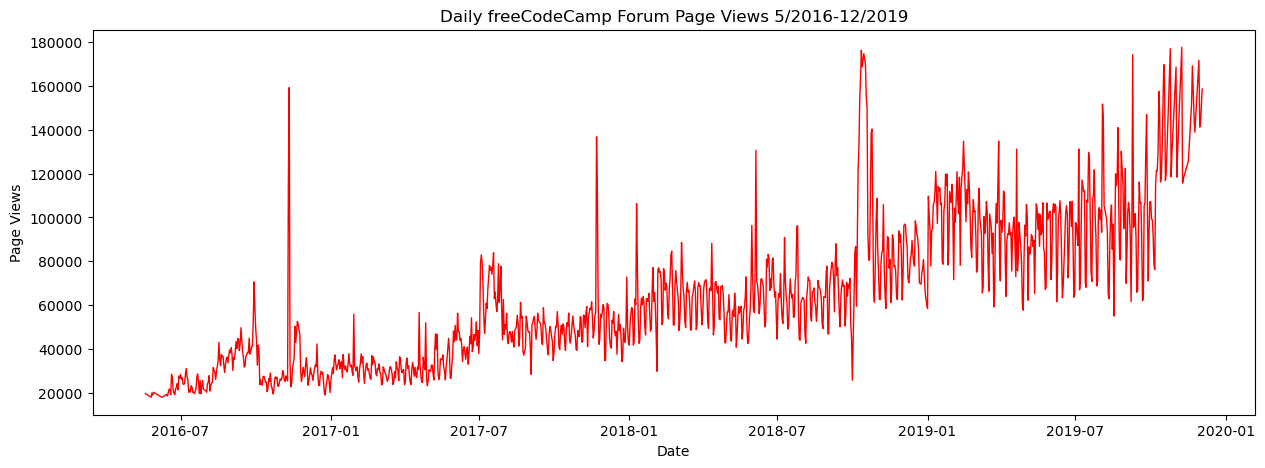

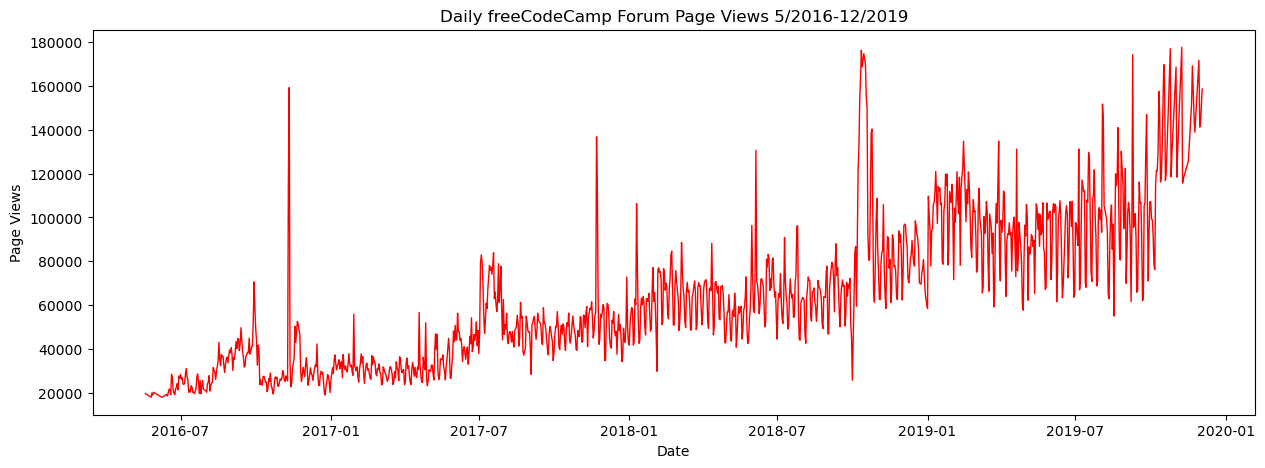

In [322]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

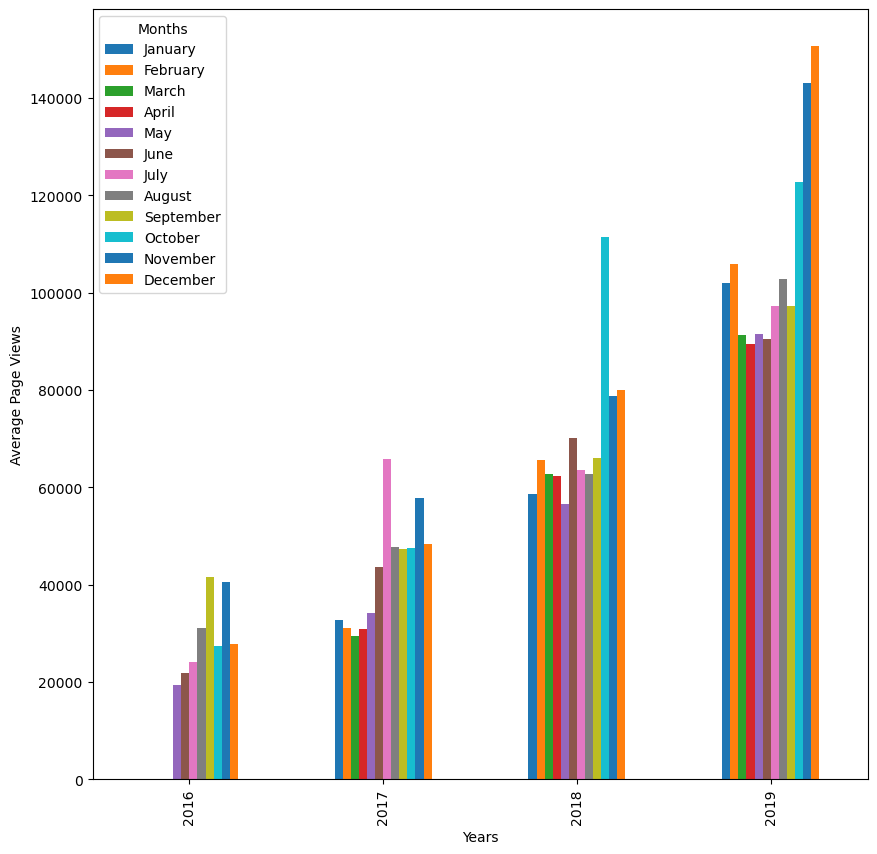

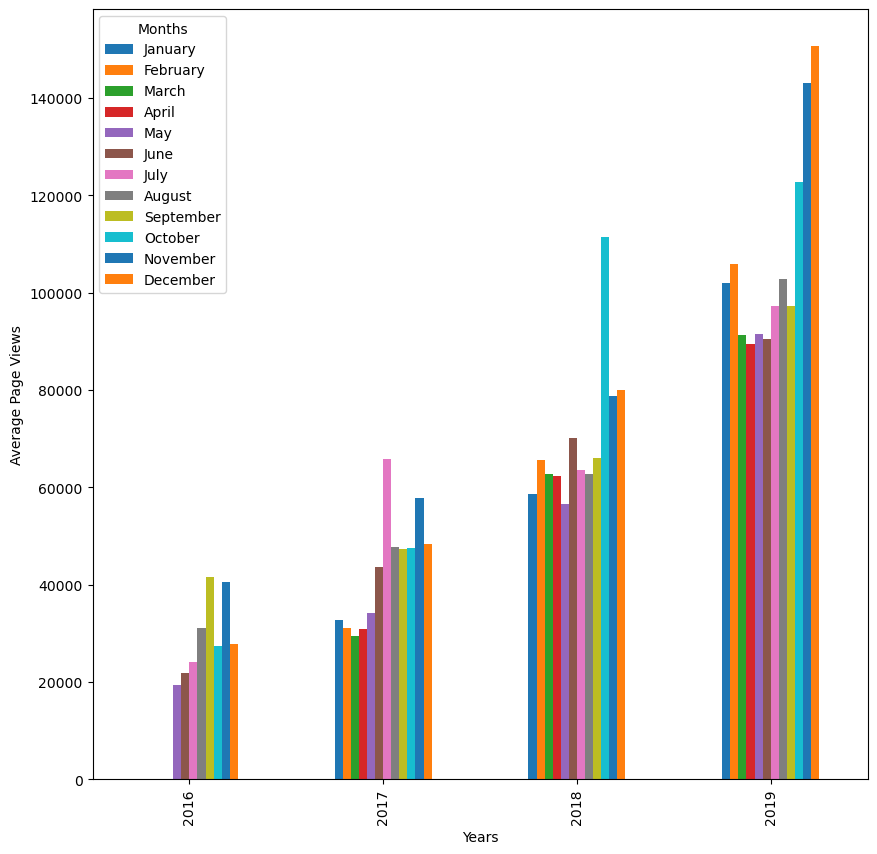

In [323]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()

    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    
    
    # Draw bar plot
    fig, ax = plt.subplots(figsize=(10, 10))
    df_bar.plot(kind='bar', ax=ax)
    
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months', loc='upper left')


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

           date   value  year month
0    2016-05-19   19736  2016   May
1    2016-05-26   18060  2016   May
2    2016-05-27   19997  2016   May
3    2016-05-28   19044  2016   May
4    2016-05-29   20325  2016   May
...         ...     ...   ...   ...
1233 2019-11-24  138875  2019   Nov
1234 2019-11-29  171584  2019   Nov
1235 2019-11-30  141161  2019   Nov
1236 2019-12-01  142918  2019   Dec
1237 2019-12-03  158549  2019   Dec

[1238 rows x 4 columns]


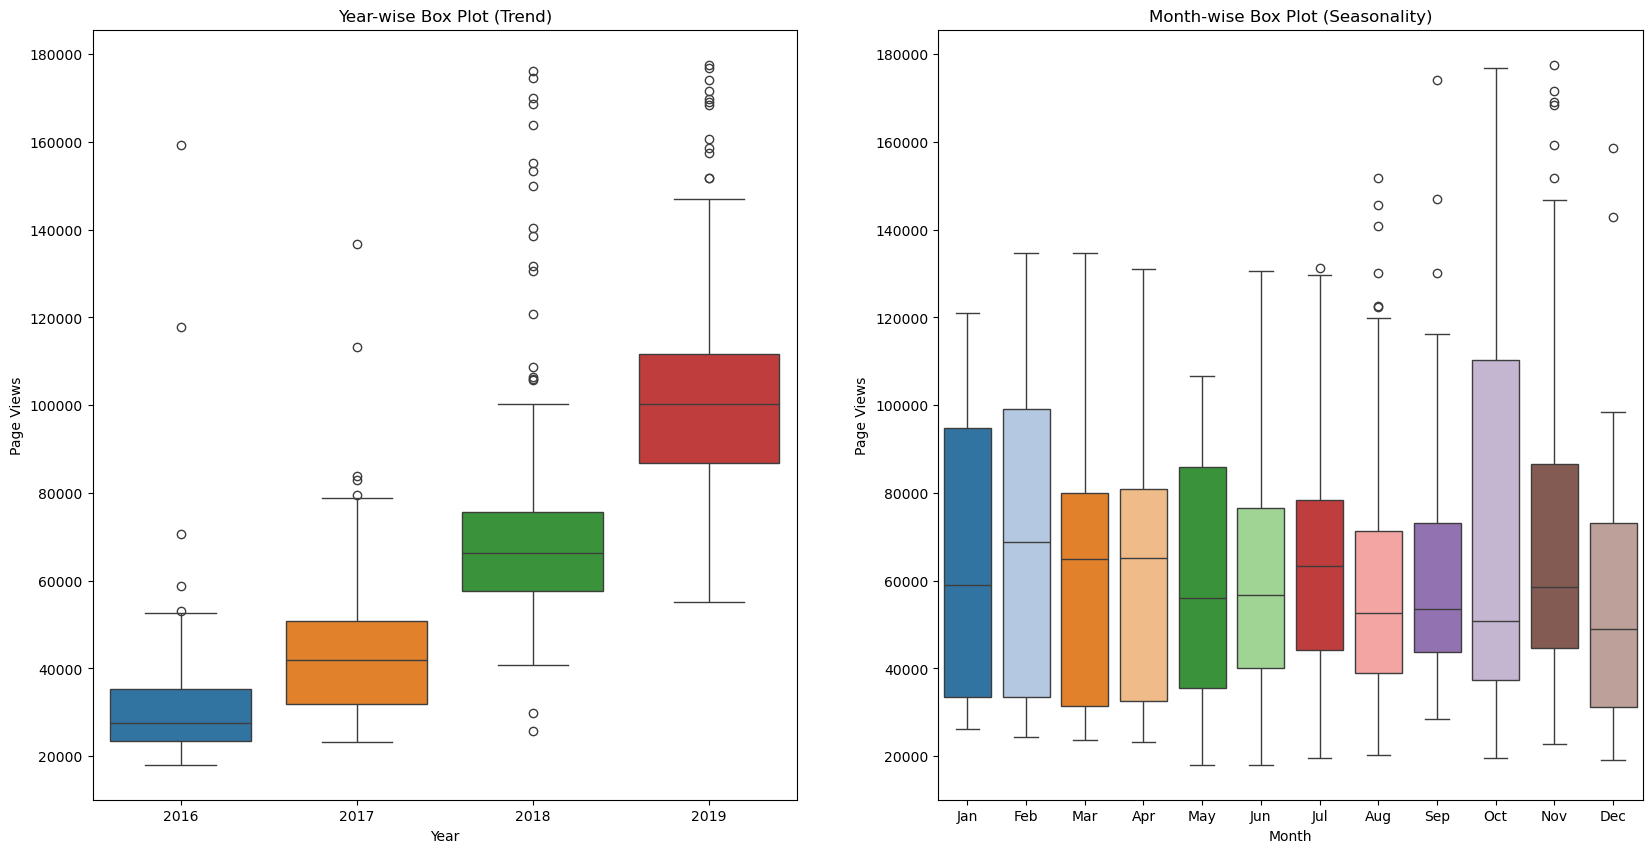

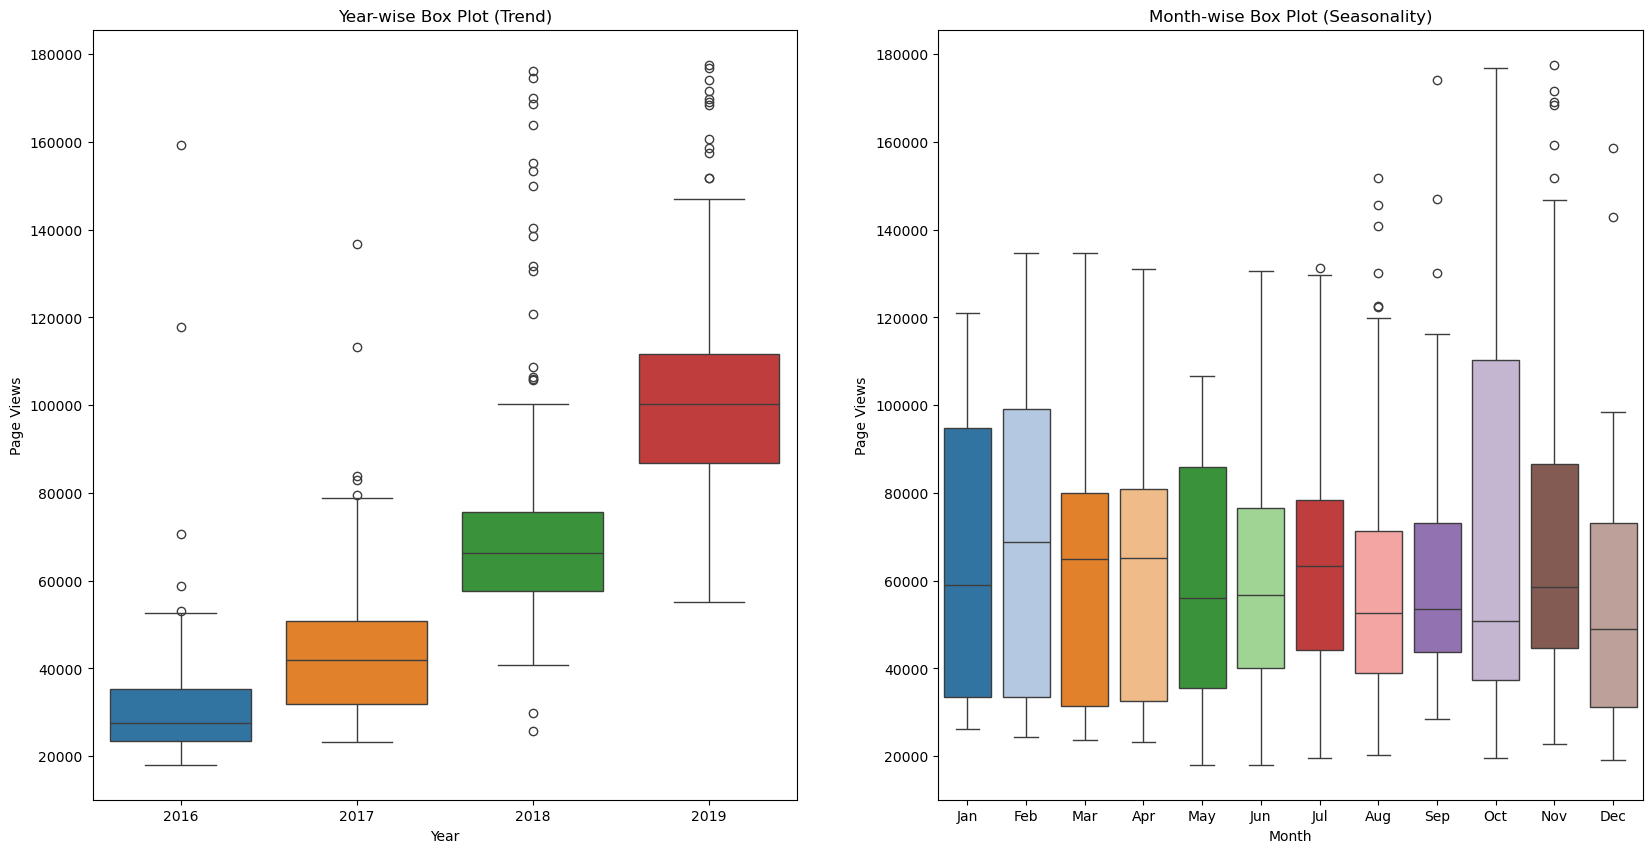

In [324]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box["month"] = pd.Categorical(
        df_box["month"], 
        categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
        ordered=True
    )
    
    
    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    sns.boxplot(x='year', y='value', data=df_box, ax=ax[0], palette='tab10', hue='year', legend=False)
    sns.boxplot(x='month', y='value', data=df_box, ax=ax[1], palette='tab20', hue='month', legend=False)
    
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')
    
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')
    
    plt.suptitle('')
    


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()

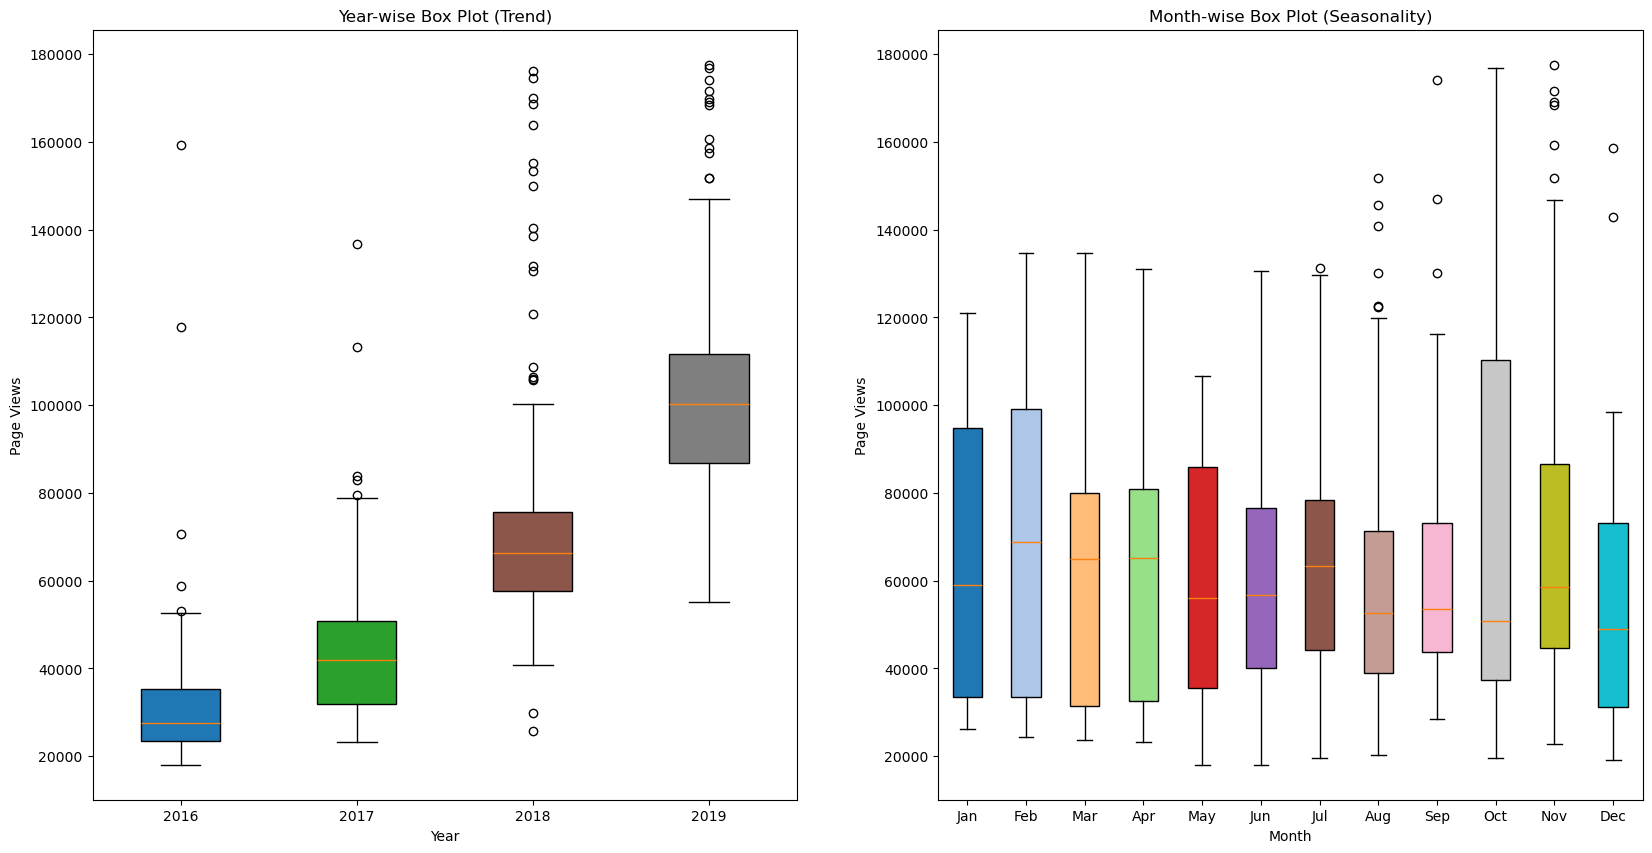

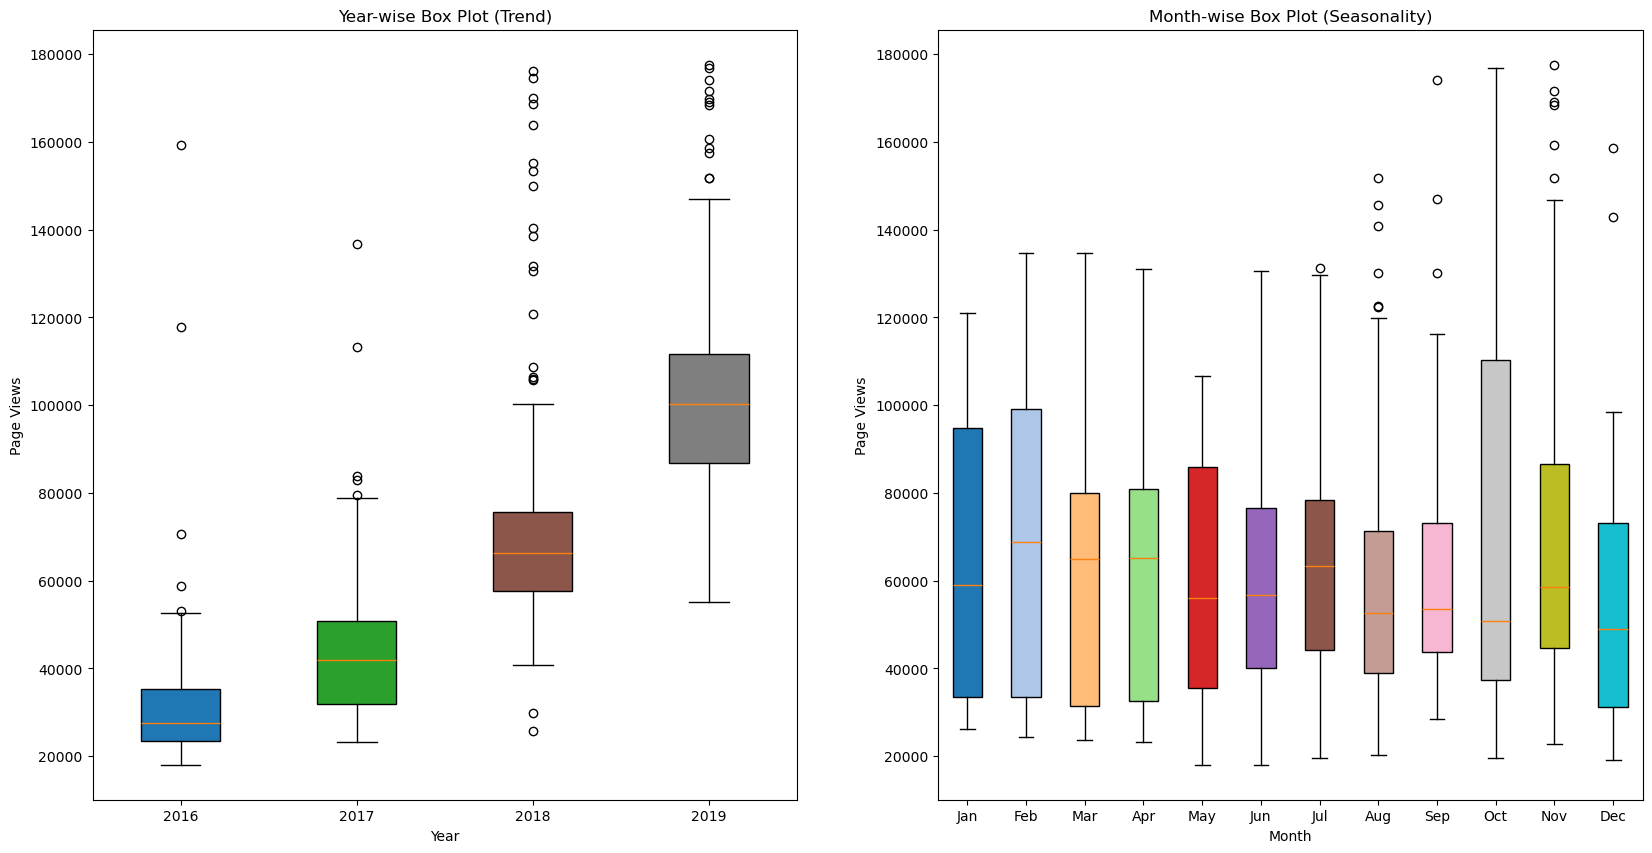

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# def draw_box_plot():
#     # Prepare data for box plots
#     df_box = df.copy()
#     df_box.reset_index(inplace=True)
#     df_box['year'] = [d.year for d in df_box.date]
#     df_box['month'] = [d.strftime('%b') for d in df_box.date]
#     df_box["month"] = pd.Categorical(
#         df_box["month"], 
#         categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
#         ordered=True
#     )

#     # Draw box plots
#     fig, axes = plt.subplots(1, 2, figsize=(20, 10))

#     # Year-wise box plot
#     year_groups = [df_box[df_box['year'] == year]['value'] for year in df_box['year'].unique()]
#     cmap_year = plt.get_cmap('tab10')
#     year_colors = [cmap_year(i / len(year_groups)) for i in range(len(year_groups))]
#     bplot_year = axes[0].boxplot(year_groups, patch_artist=True, labels=df_box['year'].unique())
#     for patch, color in zip(bplot_year['boxes'], year_colors):
#         patch.set_facecolor(color)

#     axes[0].set_title('Year-wise Box Plot (Trend)')
#     axes[0].set_xlabel('Year')
#     axes[0].set_ylabel('Page Views')

#     # Month-wise box plot
#     month_groups = [df_box[df_box['month'] == month]['value'] for month in df_box['month'].cat.categories]
#     cmap_month = plt.get_cmap('tab20')
#     month_colors = [cmap_month(i / len(month_groups)) for i in range(len(month_groups))]
#     bplot_month = axes[1].boxplot(month_groups, patch_artist=True, labels=df_box['month'].cat.categories)
#     for patch, color in zip(bplot_month['boxes'], month_colors):
#         patch.set_facecolor(color)

#     axes[1].set_title('Month-wise Box Plot (Seasonality)')
#     axes[1].set_xlabel('Month')
#     axes[1].set_ylabel('Page Views')

#     plt.suptitle('')  # Remove the default "by" title from pandas' boxplot

#     # Save image and return fig
#     fig.savefig('box_plot.png')
#     return fig

# # Assuming df is already defined and loaded with data
# draw_box_plot()


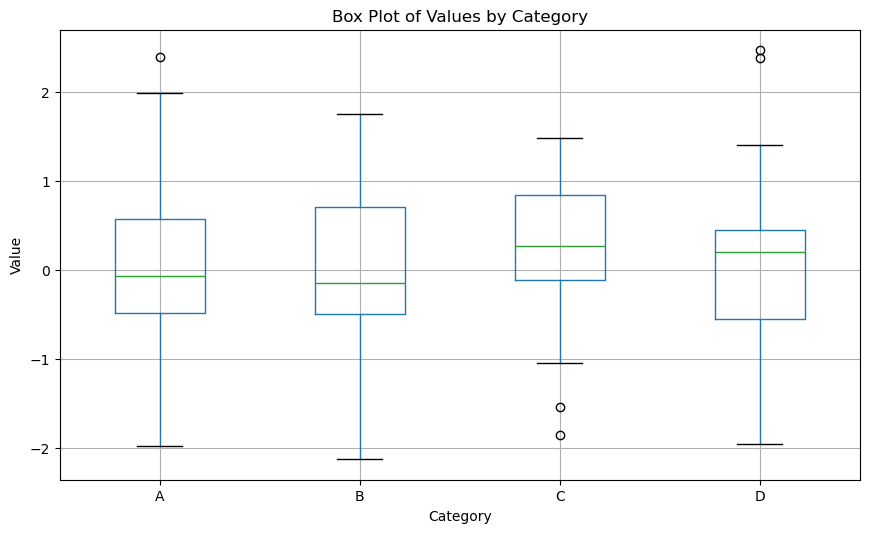

In [326]:

# Sample data
np.random.seed(10)
data = {
    'category': ['A', 'B', 'C', 'D'] * 25,
    'value': np.random.randn(100)
}
df = pd.DataFrame(data)

# Create a box plot
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='value', by='category', ax=ax)

ax.set_title('Box Plot of Values by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Value')
plt.suptitle('')  # Suppress the default title to avoid duplication

plt.show()

In [327]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x: 'ArrayLike | Sequence[ArrayLike]', notch: 'bool | None' = None, sym: 'str | None' = None, vert: 'bool | None' = None, whis: 'float | tuple[float, float] | None' = None, positions: 'ArrayLike | None' = None, widths: 'float | ArrayLike | None' = None, patch_artist: 'bool | None' = None, bootstrap: 'int | None' = None, usermedians: 'ArrayLike | None' = None, conf_intervals: 'ArrayLike | None' = None, meanline: 'bool | None' = None, showmeans: 'bool | None' = None, showcaps: 'bool | None' = None, showbox: 'bool | None' = None, showfliers: 'bool | None' = None, boxprops: 'dict[str, Any] | None' = None, labels: 'Sequence[str] | None' = None, flierprops: 'dict[str, Any] | None' = None, medianprops: 'dict[str, Any] | None' = None, meanprops: 'dict[str, Any] | None' = None, capprops: 'dict[str, Any] | None' = None, whiskerprops: 'dict[str, Any] | None' = None, manage_ticks: 'bool' = True, autorange: 'bool' = False, zorder: 'float